## Importing Libraries

In [190]:
import pandas as pd
import os
import sweetviz as sv
import geopandas as gpd
from shapely import wkt
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import geodatasets
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import warnings
import plotly.express as px
from geopy.geocoders import ArcGIS
import geopandas as gpd
import numpy as np
import re
warnings.filterwarnings('ignore')

In [191]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Project Management/Head Competition/Code/Datasets')

In [192]:
os.listdir('.')

['20240117-2024-Facilities-Details-FCI.xlsx',
 'city_451_BCCAQv2_RCP85_annual_plus30_ensemble.csv',
 'CoH-CFEM-2023-Facilities-Details.xlsx',
 'facilities_wlocation.csv',
 'Metadata',
 'Ward_Boundaries.geojson',
 'Ward_Boundaries.json',
 'Ward_Boundaries_json.json',
 'weather_databases']

# DB1

## Reading DB1

In [193]:
df_1=pd.read_excel("CoH-CFEM-2023-Facilities-Details.xlsx").loc[1:,:]
df_1.columns=df_1.iloc[0]
df_1 = df_1.drop(1)
df_1.head()

1,Asset Name,Asset Type,Asset Address,Asset Size,Asset Measure Unit,Asset Date Built,2023 FCI Rating
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,Sq.Ft.,1986-04-26,0.066459
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,Sq.Ft.,1973-01-02,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,Sq.Ft.,2011-01-01,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,Sq.Ft.,1982-01-02,0.012063
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,Sq.Ft.,1996-01-02,0.082996


In [194]:
df_1.shape

(500, 7)

In [195]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 2 to 501
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Asset Name          497 non-null    object
 1   Asset Type          497 non-null    object
 2   Asset Address       497 non-null    object
 3   Asset Size          485 non-null    object
 4   Asset Measure Unit  497 non-null    object
 5   Asset Date Built    490 non-null    object
 6   2023 FCI Rating     498 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


## Addressing problem 1

In [196]:
df_1=df_1.drop(columns=["Asset Measure Unit"])
df_1=df_1.rename(columns={"Asset Size":"Asset Size SQF"})
df_1.head()

1,Asset Name,Asset Type,Asset Address,Asset Size SQF,Asset Date Built,2023 FCI Rating
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,1986-04-26,0.066459
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,1973-01-02,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,2011-01-01,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,1982-01-02,0.012063
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,1996-01-02,0.082996


## Addressing problem 2 and 3

In [197]:
df_1=df_1[~((df_1["Asset Name"].isnull()) | (df_1["Asset Size SQF"].isnull()) | (df_1["Asset Date Built"].isnull()))]
df_1.head()

1,Asset Name,Asset Type,Asset Address,Asset Size SQF,Asset Date Built,2023 FCI Rating
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,1986-04-26,0.066459
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,1973-01-02,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,2011-01-01,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,1982-01-02,0.012063
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,1996-01-02,0.082996


In [198]:
df_1.shape

(485, 6)

In [199]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 2 to 498
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Asset Name        485 non-null    object
 1   Asset Type        485 non-null    object
 2   Asset Address     485 non-null    object
 3   Asset Size SQF    485 non-null    object
 4   Asset Date Built  485 non-null    object
 5   2023 FCI Rating   485 non-null    object
dtypes: object(6)
memory usage: 26.5+ KB


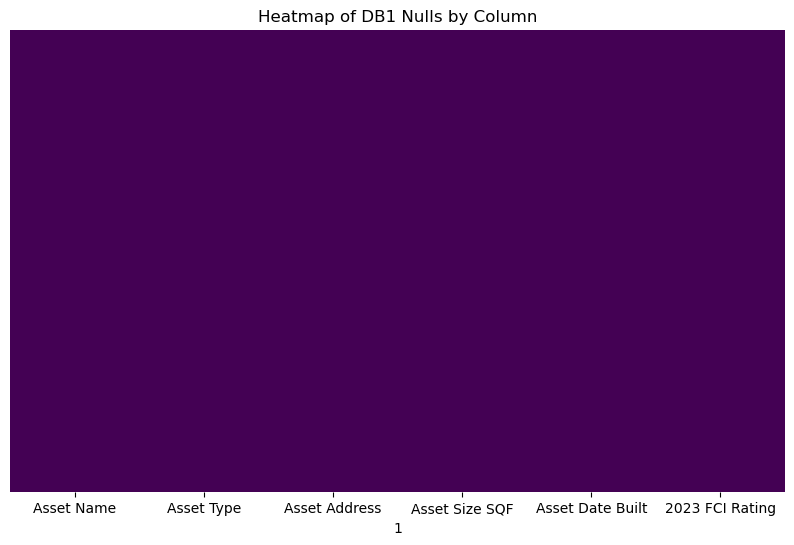

In [200]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_1.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of DB1 Nulls by Column')
plt.show()

# DB2

In [201]:
df_2=pd.read_excel("20240117-2024-Facilities-Details-FCI.xlsx").loc[1:,:]
df_2.columns=df_2.iloc[0]
df_2 = df_2.drop(1)
df_2.head()

1,Asset Name,Asset Type,Asset Name: Address,Asset Name: Size,Asset Name: Measure Unit,Asset Name: Date Built,Custom: Assessment Date,Asset Name: Current Replacement Value,Current Needs Value,Asset Name: Current FCI
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,Sq.Ft.,1986-04-26,Model,12828450.29,972839.51,0.075835
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,Sq.Ft.,1973-01-02,2017,395826.67,39145.35,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,Sq.Ft.,2011-01-01,2017,14585.22,0,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,Sq.Ft.,1982-01-02,2020,13716984.75,304172.85,0.022175
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,Sq.Ft.,1996-01-02,2011,225260.62,18695.65,0.082996


In [202]:
df_2.shape

(497, 10)

In [203]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 2 to 498
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Asset Name                             497 non-null    object
 1   Asset Type                             497 non-null    object
 2   Asset Name: Address                    497 non-null    object
 3   Asset Name: Size                       485 non-null    object
 4   Asset Name: Measure Unit               497 non-null    object
 5   Asset Name: Date Built                 490 non-null    object
 6   Custom: Assessment Date                472 non-null    object
 7   Asset Name: Current Replacement Value  486 non-null    object
 8   Current Needs Value                    483 non-null    object
 9   Asset Name: Current FCI                483 non-null    object
dtypes: object(10)
memory usage: 39.0+ KB


## Addressing problem 4

In [204]:
df_2=df_2.drop(columns=["Asset Name: Measure Unit"])
df_2=df_2.rename(columns={"Asset Name: Measure Unit":"Asset Size SQF"})
df_2.head()

1,Asset Name,Asset Type,Asset Name: Address,Asset Name: Size,Asset Name: Date Built,Custom: Assessment Date,Asset Name: Current Replacement Value,Current Needs Value,Asset Name: Current FCI
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,1986-04-26,Model,12828450.29,972839.51,0.075835
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,1973-01-02,2017,395826.67,39145.35,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,2011-01-01,2017,14585.22,0,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,1982-01-02,2020,13716984.75,304172.85,0.022175
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,1996-01-02,2011,225260.62,18695.65,0.082996


In [205]:
df_2.shape

(497, 9)

In [206]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 2 to 498
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Asset Name                             497 non-null    object
 1   Asset Type                             497 non-null    object
 2   Asset Name: Address                    497 non-null    object
 3   Asset Name: Size                       485 non-null    object
 4   Asset Name: Date Built                 490 non-null    object
 5   Custom: Assessment Date                472 non-null    object
 6   Asset Name: Current Replacement Value  486 non-null    object
 7   Current Needs Value                    483 non-null    object
 8   Asset Name: Current FCI                483 non-null    object
dtypes: object(9)
memory usage: 35.1+ KB


## Addressing problem 5

In [207]:
df_2=df_2[(~(df_2["Asset Name: Current Replacement Value"].isnull())) &
          (df_2["Asset Name: Current Replacement Value"]!=0)
          ]
df_2.head()

1,Asset Name,Asset Type,Asset Name: Address,Asset Name: Size,Asset Name: Date Built,Custom: Assessment Date,Asset Name: Current Replacement Value,Current Needs Value,Asset Name: Current FCI
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,1986-04-26,Model,12828450.29,972839.51,0.075835
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,1973-01-02,2017,395826.67,39145.35,0.098895
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,2011-01-01,2017,14585.22,0,0
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,1982-01-02,2020,13716984.75,304172.85,0.022175
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,1996-01-02,2011,225260.62,18695.65,0.082996


In [208]:
df_2.shape

(483, 9)

In [209]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 2 to 498
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Asset Name                             483 non-null    object
 1   Asset Type                             483 non-null    object
 2   Asset Name: Address                    483 non-null    object
 3   Asset Name: Size                       483 non-null    object
 4   Asset Name: Date Built                 483 non-null    object
 5   Custom: Assessment Date                470 non-null    object
 6   Asset Name: Current Replacement Value  483 non-null    object
 7   Current Needs Value                    483 non-null    object
 8   Asset Name: Current FCI                483 non-null    object
dtypes: object(9)
memory usage: 37.7+ KB


## Addressing problem 6

Model: When "Model" is mentioned under "Custom: Assessment Date," it implies that the assessment was carried out using a theoretical or computational model. 

Audit: On the other hand, when "Audit" is listed, it indicates that the assessment was performed through an actual physical inspection or a detailed review of the asset. An audit involves on-site visits, inspections, and evaluations by professionals to accurately assess the condition, value, and needs of the asset.

In [210]:
def clean_row(row):
    date=row["Custom: Assessment Date"]

    if date=="Model": 
        type="Model"
        date=None
    elif date=="Audit": 
        type="Audit"
        date=None
    else: type="Audit"

    return date, type

In [211]:
df_2[['Custom: Assessment Date', 'Type of assessment']]=df_2.apply(lambda row:clean_row(row),axis=1, result_type='expand')
df_2.head()

1,Asset Name,Asset Type,Asset Name: Address,Asset Name: Size,Asset Name: Date Built,Custom: Assessment Date,Asset Name: Current Replacement Value,Current Needs Value,Asset Name: Current FCI,Type of assessment
2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411,1986-04-26,None,12828450.29,972839.51,0.075835,Model
3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954,1973-01-02,2017,395826.67,39145.35,0.098895,Audit
4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72,2011-01-01,2017,14585.22,0,0,Audit
5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067,1982-01-02,2020,13716984.75,304172.85,0.022175,Audit
6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112,1996-01-02,2011,225260.62,18695.65,0.082996,Audit


In [212]:
df_2.shape

(483, 10)

In [213]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 2 to 498
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Asset Name                             483 non-null    object
 1   Asset Type                             483 non-null    object
 2   Asset Name: Address                    483 non-null    object
 3   Asset Name: Size                       483 non-null    object
 4   Asset Name: Date Built                 483 non-null    object
 5   Custom: Assessment Date                424 non-null    object
 6   Asset Name: Current Replacement Value  483 non-null    object
 7   Current Needs Value                    483 non-null    object
 8   Asset Name: Current FCI                483 non-null    object
 9   Type of assessment                     483 non-null    object
dtypes: object(10)
memory usage: 41.5+ KB


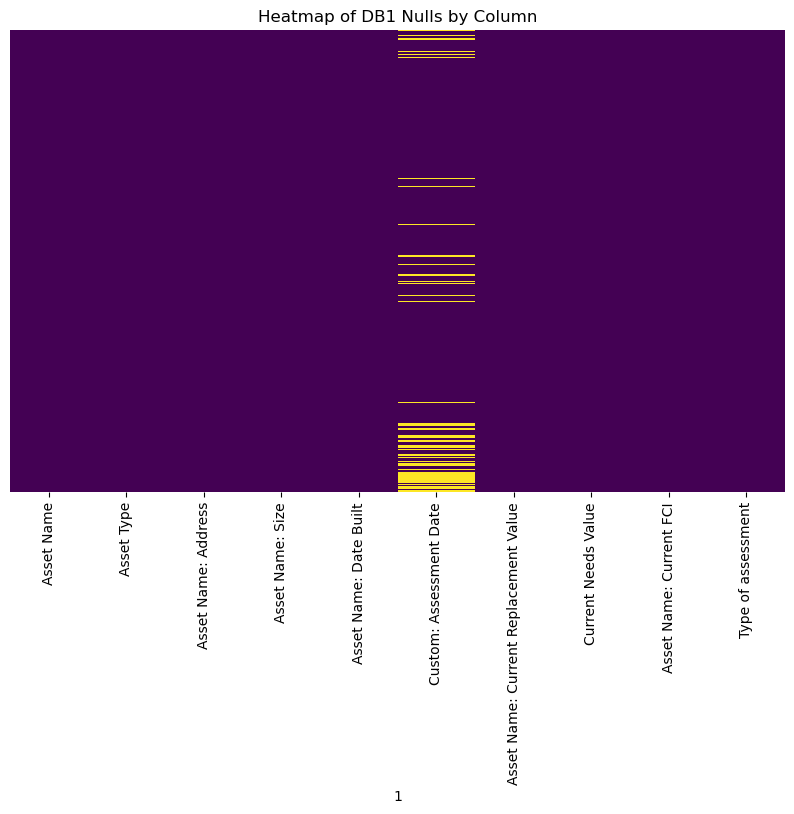

In [214]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_2.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of DB1 Nulls by Column')
plt.show()